## Spaceship Titanic
### 데이터 결측치 보정 - Feature : HomePlanet 및 CryoSleep

---
> (원본 데이터) Kaggle data contest : [링크](https://www.kaggle.com/competitions/spaceship-titanic/overview)

### 피처 설명

- **PassengerId** : 각 승객의 고유 ID. 각 Id는 승객이 함께 여행하는 그룹을 나타내고 그룹 내의 번호를 나타내는 형식을 취합니다. 그룹의 사람들은 종종 가족 구성원이지만 항상 그런 것은 아닙니다.
- **HomePlanet** : 승객이 출발한 행성으로, 일반적으로 승객이 거주하는 행성입니다.
- **CryoSleep** : 승객이 항해 기간 동안 정지된 애니메이션을 선택했는지 여부를 나타냅니다. cryosleep의 승객은 객실에 갇혀 있습니다.
- **Cabin** : 승객이 머무르는 캐빈 번호. 형식을 취합니다 deck/num/side. 여기 에서 Port 또는 Starboard 가 side될 수 있습니다.
- **Destination** : 승객이 내릴 행성.
- **Age** : 승객의 나이.
- **VIP** : 승객이 항해 중 특별 VIP 서비스 비용을 지불했는지 여부.
- **RoomService, FoodCourt, ShoppingMall, Spa, VRDeck** : 승객이 Spaceship Titanic 의 다양한 고급 편의 시설 각각에 대해 청구한 금액입니다.
- **Name** : 승객의 성과 이름.
- **<span style='color:red'>Transported</span>** : 승객이 다른 차원으로 이동했는지 여부. 이것은 목표, 예측하려는 열입니다

In [5]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
import missingno
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid', font_scale=1.4)
from imblearn.over_sampling import SMOTE
import itertools
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import time

In [15]:
# DataFrame으로 데이터 세트 로딩

df = pd.read_csv('./spaceship_train.csv')
df.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


In [8]:
# 로딩된 데이터 피처(칼럼)의 타입 확인

print('\n -------피처별 데이터 타입 정보------- \n')
print(df.info())


 -------피처별 데이터 타입 정보------- 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB
None


In [13]:
# 주요 피처들의 데이터 분류 확인
# 총 8693개가 필요

print(df.columns.values)
print('------------------------------------')
print(df['HomePlanet'].value_counts())
print('------------------------------------')
print(df['CryoSleep'].value_counts())
print('------------------------------------')
print(df['Cabin'].str[0].value_counts())
print('------------------------------------')
print(df['Destination'].value_counts())
print('------------------------------------')
print(df['Age'].value_counts())
print('------------------------------------')
print(df['VIP'].value_counts())
print('------------------------------------')
print(df['Transported'].value_counts())

['PassengerId' 'HomePlanet' 'CryoSleep' 'Cabin' 'Destination' 'Age' 'VIP'
 'RoomService' 'FoodCourt' 'ShoppingMall' 'Spa' 'VRDeck' 'Name'
 'Transported']
------------------------------------
Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64
------------------------------------
False    5439
True     3037
Name: CryoSleep, dtype: int64
------------------------------------
F    2794
G    2559
E     876
B     779
C     747
D     478
A     256
T       5
Name: Cabin, dtype: int64
------------------------------------
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64
------------------------------------
24.0    324
18.0    320
21.0    311
19.0    293
23.0    292
       ... 
72.0      4
78.0      3
79.0      3
76.0      2
77.0      2
Name: Age, Length: 80, dtype: int64
------------------------------------
False    8291
True      199
Name: VIP, dtype: int64
------------------------------------
True     4378
False    4315
N

<AxesSubplot:>

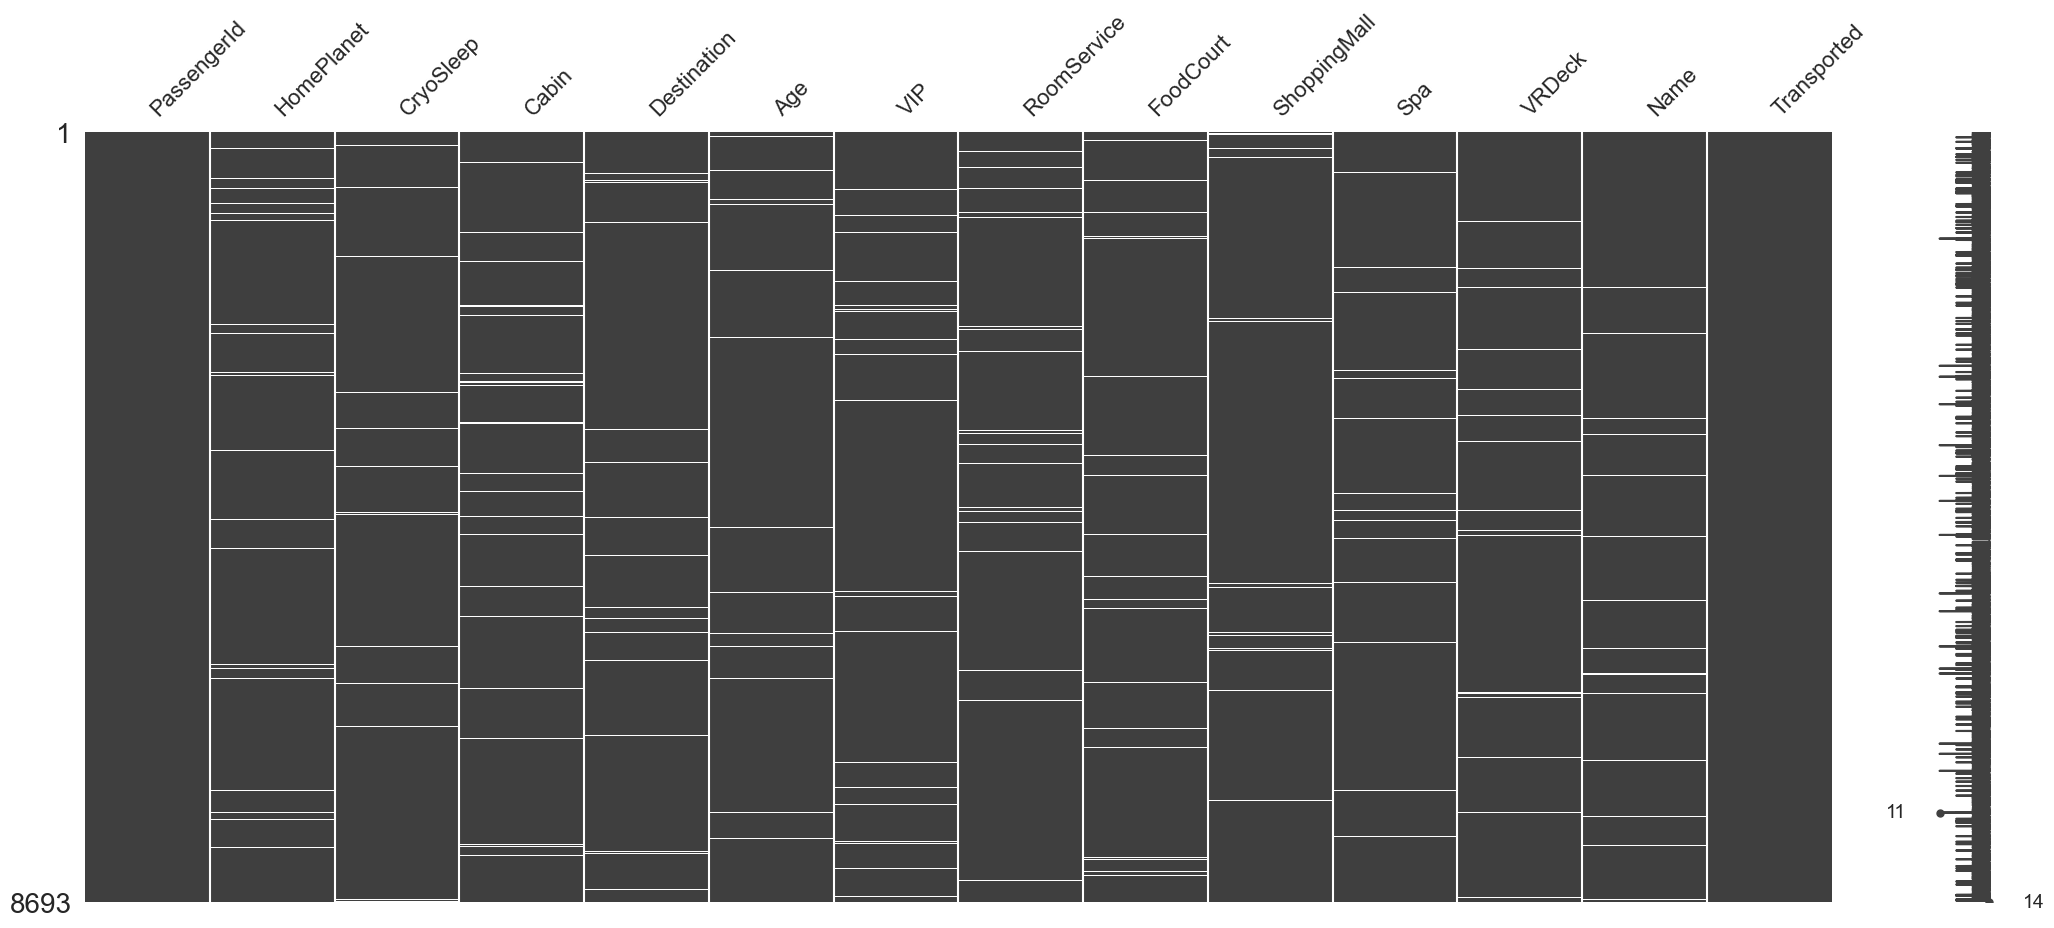

In [12]:
#결측치 확인

missingno.matrix(df)

## 데이터 결측치 처리

### (1) HomePlanet : 201개의 NaN 값 (2.31%)

- train dataset에 따르면 아래와 같은 중요한 특징을 발견할 수 있다.

**1. Name feature로부터 서로 같은 성씨(Last name)인 경우에는 같은 행성 출신이다.**

**2. PassengerID는 0000_00 꼴인데 앞의 4자리가 같으면 일행이다. 즉, 같은 행성 출신이다.**

- 따라서 이 두 가지 사실을 이용하여 남은 결측치를 채울 수 있을 것이다.

Text(0.5, 1.0, 'Group size')

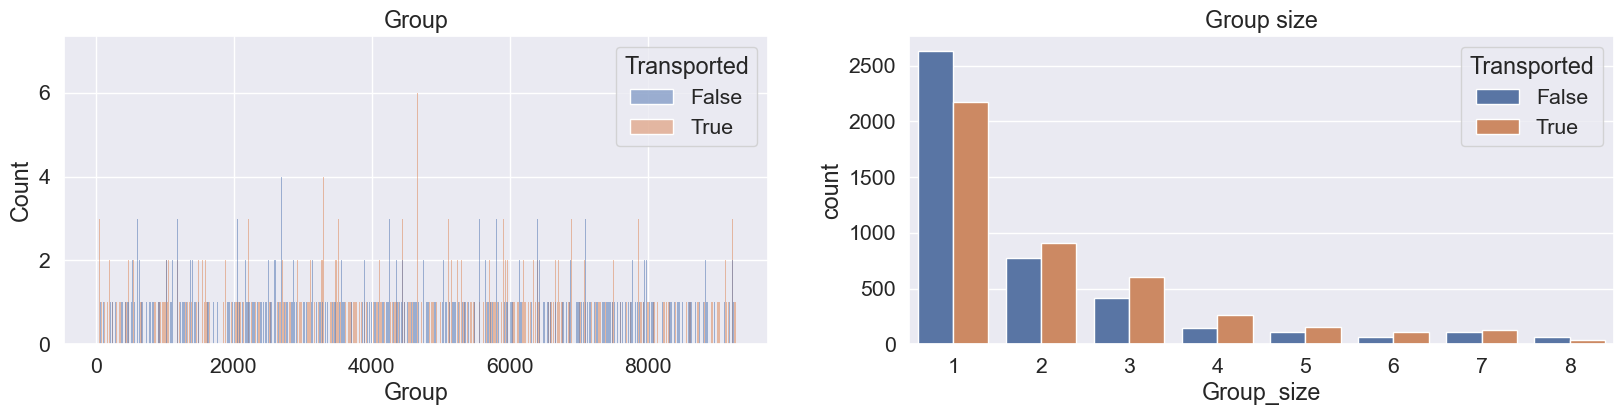

In [26]:
# New feature - Group # id 에서 _ 앞에 오는 숫자
df['Group'] = df['PassengerId'].apply(lambda x: x.split('_')[0]).astype(int)

# New feature - Group size
df['Group_size']= df['Group'].map(lambda x: pd.concat([df['Group']]).value_counts()[x])

# Plot distribution of new features
plt.figure(figsize=(20,4))
plt.subplot(1,2,1)
sns.histplot(data=df, x='Group', hue='Transported', binwidth=1)
plt.title('Group')

plt.subplot(1,2,2)
sns.countplot(data=df, x='Group_size', hue='Transported')
plt.title('Group size')

(0.0, 3000.0)

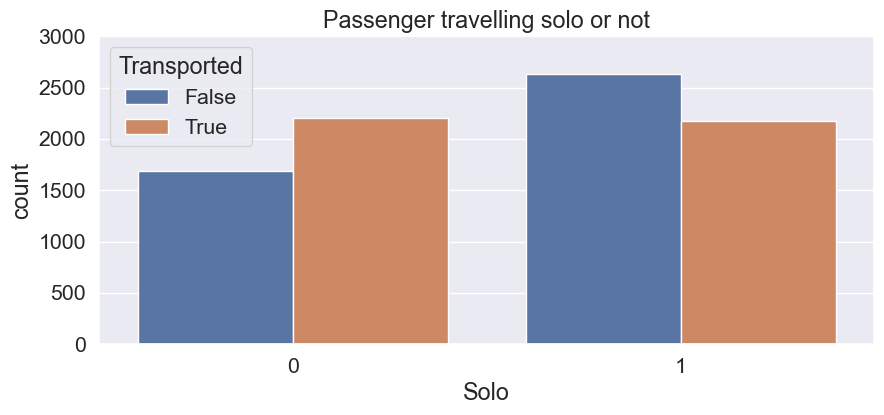

In [25]:
df['Solo']=(df['Group_size']==1).astype(int)

plt.figure(figsize=(10,4))
sns.countplot(data=df, x='Solo', hue='Transported')
plt.title('Passenger travelling solo or not')
plt.ylim([0,3000])

본격적으로 NaN 값을 채우기 위한 과정 시작!

Text(0.5, 1.0, 'Family size')

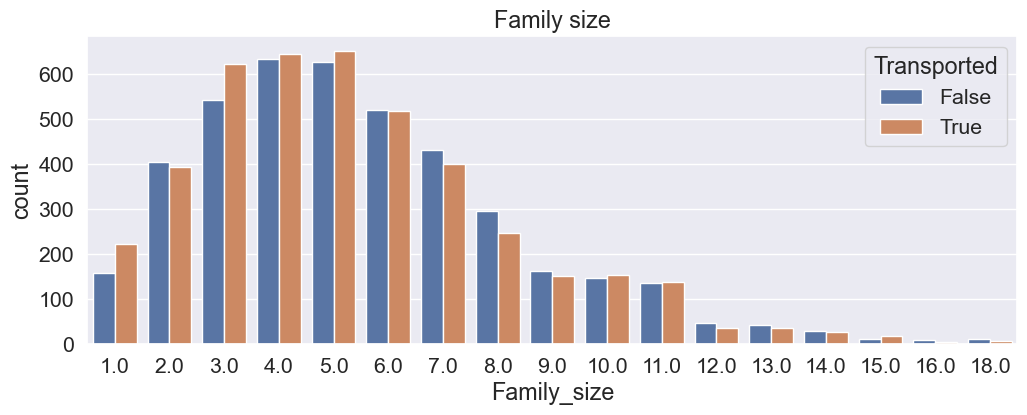

In [31]:
# Replace NaN's with outliers for now (so we can split feature)
df['Name'].fillna('Unknown Unknown', inplace=True)

# New feature - Surname
df['Surname']=df['Name'].str.split().str[-1]

# New feature - Family size
df['Family_size']=df['Surname'].map(lambda x: pd.concat([df['Surname']]).value_counts()[x])

# Put Nan's back in (we will fill these later)
df.loc[df['Surname']=='Unknown','Surname']=np.nan
df.loc[df['Family_size']>100,'Family_size']=np.nan

# Drop name (we don't need it anymore)
df.drop('Name', axis=1, inplace=True)

# New feature distribution
plt.figure(figsize=(12,4))
sns.countplot(data=df, x='Family_size', hue='Transported')
plt.title('Family size')

In [32]:
# Labels and features
y=df['Transported'].copy().astype(int)
X=df.drop('Transported', axis=1).copy()

# Concatenate dataframes
data=pd.concat([X], axis=0).reset_index(drop=True)
# Columns with missing values
na_cols=data.columns[data.isna().any()].tolist() #결측값이 있는 칼럼들의 이름을 na_cols에 저장

# Missing values summary
mv=pd.DataFrame(data[na_cols].isna().sum(), columns=['Number_missing'])
mv['Percentage_missing']=np.round(100*mv['Number_missing']/len(data),2)
mv

,Number_missing,Percentage_missing
HomePlanet,201,2.31
CryoSleep,217,2.50
Cabin,199,2.29
Destination,182,2.09
Age,179,2.06
VIP,203,2.34
RoomService,181,2.08
FoodCourt,183,2.11
ShoppingMall,208,2.39
Spa,183,2.11


In [33]:
# 그룹화 시켜 결측값 처리 시작!

GHP_gb=data.groupby(['Group','HomePlanet'])['HomePlanet'].size().unstack().fillna(0)
GHP_gb.head(10)

HomePlanet,Earth,Europa,Mars
Group,,,
1,0.0,1.0,0.0
2,1.0,0.0,0.0
3,0.0,2.0,0.0
4,1.0,0.0,0.0
5,1.0,0.0,0.0
6,2.0,0.0,0.0
7,1.0,0.0,0.0
8,0.0,3.0,0.0
9,0.0,0.0,1.0


Text(0.5, 1.0, 'Number of unique home planets per group')

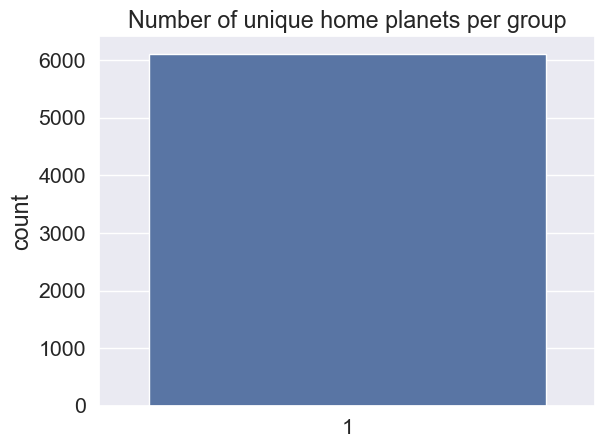

In [34]:
# Countplot of unique values 

sns.countplot((GHP_gb>0).sum(axis=1))
plt.title('Number of unique home planets per group')

### HomePlanet 컬럼이 결측치인 승객 중, 그룹 내에서 다른 HomePlanet이 적어도 하나 존재하는 그룹의 경우 해당그룹의 존재하는 승객의 고향을 따오는 과정

In [35]:
# Missing values before
HP_bef=data['HomePlanet'].isna().sum() # HomePlanet이 결측치인 갯수

# Passengers with missing HomePlanet and in a group with known HomePlanet
GHP_index=data[data['HomePlanet'].isna()][(data[data['HomePlanet'].isna()]['Group']).isin(GHP_gb.index)].index  #HomePlanet 컬럼이 결측치인 승객 중, 그룹 내에서 다른 HomePlanet이 적어도 하나 존재하는 그룹을 갖는 승객의 인덱스

# Fill corresponding missing values
data.loc[GHP_index,'HomePlanet']=data.iloc[GHP_index,:]['Group'].map(lambda x: GHP_gb.idxmax(axis=1)[x])

# Print number of missing values left
print('#HomePlanet missing values before:',HP_bef)
print('#HomePlanet missing values after:',data['HomePlanet'].isna().sum())

#HomePlanet missing values before: 201
#HomePlanet missing values after: 111


결측치가 111개로 줄어듬!

### 남은 HomePlanet 컬럼이 결측치인 승객 중, 그룹 내에서 Surname이 같을 경우에 해당그룹에 존재하는 승객의 고향을 따오는 과정

Text(0.5, 1.0, 'Number of unique planets per surname')

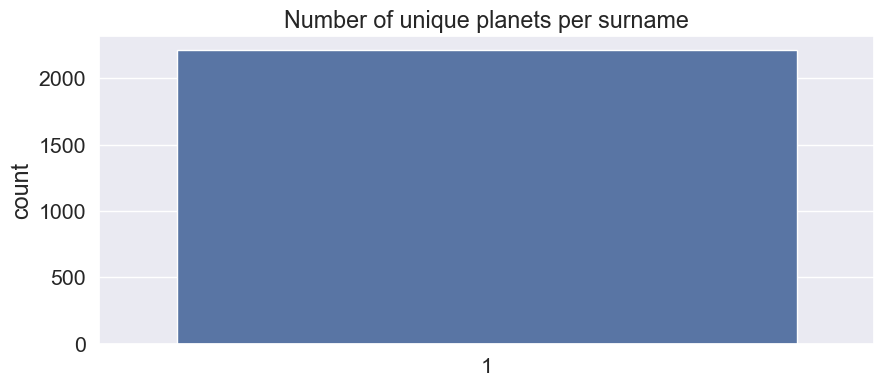

In [36]:
# Joint distribution of Surname and HomePlanet
SHP_gb=data.groupby(['Surname','HomePlanet'])['HomePlanet'].size().unstack().fillna(0)

# Countplot of unique values
plt.figure(figsize=(10,4))
sns.countplot((SHP_gb>0).sum(axis=1))
plt.title('Number of unique planets per surname')

In [37]:
HP_bef=data['HomePlanet'].isna().sum()

# Passengers with missing HomePlanet and in a family with known HomePlanet
SHP_index=data[data['HomePlanet'].isna()][(data[data['HomePlanet'].isna()]['Surname']).isin(SHP_gb.index)].index

# Fill corresponding missing values
data.loc[SHP_index,'HomePlanet']=data.iloc[SHP_index,:]['Surname'].map(lambda x: SHP_gb.idxmax(axis=1)[x])

# Print number of missing values left
print('#HomePlanet missing values before:',HP_bef)
print('#HomePlanet missing values after:',data['HomePlanet'].isna().sum())

#HomePlanet missing values before: 111
#HomePlanet missing values after: 12


결측치가 12개로 줄어듬! 이는 기존 201개에서 12개로 엄청나게 줄어들었다!

### 추가로 회의해야할 사항 : Cabin에 따라 이를 그룹화시켜 연결시킬지?

- 이를 결정시키고 남은 12개의 결측치를 채우면 됨(아니면 그냥 최빈값으로 대체하는 식으로 연결시킬 수 있다

### (2) CryoSleep : 217개의 NaN 값 (2.50%)

- 'CryoSleep' True/False로 구분된 논리형(Boolean) 변수임.

In [42]:
df['CryoSleep'].describe() 
#FALSE 가 5315개 TRUE는 2962개

count      8476
unique        2
top       False
freq       5439
Name: CryoSleep, dtype: object

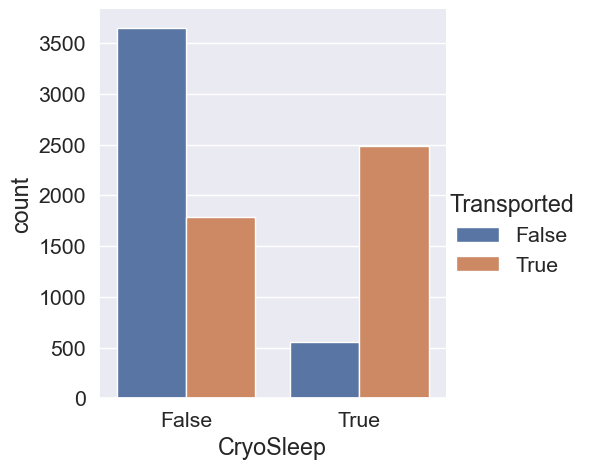

In [43]:
sns.catplot(data=df,x='CryoSleep',hue='Transported',kind='count')

- 결측값을 제외한 나머지 값 중 True는 2962개(약 35.8%), False는 5315개(약 64.2%)를 차지함.
- False 값이 약 1.8배정도 더 많이 차지함.
- 만약 결측값을 모두 False로 보관할 경우 차지하는 비율은 True(34.9%), False(65.1%)로 1% 미만 범위에서 변함.
- 따라서 1% 미만의 변화는 유의미하지 않다는 가정하에 'CryoSleep'에서 결측된 값은 False로 보관함.

In [46]:
df['CryoSleep'].fillna(False, inplace=True)
df['CryoSleep'].describe() 

count      8693
unique        2
top       False
freq       5656
Name: CryoSleep, dtype: object